In [341]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0,'../pathology_unet/')
from metrics import *

In [347]:
import matplotlib.pyplot as plt
import numpy as np

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color="white")
    

def BoxPlotGroup(ANTS,SYN,VXM,VXM_DA,Title,filename):
    

    
    # ticks = ['A', 'B', 'C']
    ticks=['Extra-axial CSF',
                    'GM and DCP',
                    'WM and subplate',
                    'Lateral ventricles',
                    'Cerebellum',
                    'Thalamus and putamen',
                    'Brainstem']




    plt.figure(figsize=(20,10))

    bp_ants = plt.boxplot(ANTS, positions=np.array(range(7))*4.0-0.8, sym='', widths=0.3,patch_artist=True)
    bp_syn = plt.boxplot(SYN, positions=np.array(range(7))*4.0-0.4, sym='', widths=0.3,patch_artist=True)
    bp_vxm = plt.boxplot(VXM, positions=np.array(range(7))*4.0, sym='', widths=0.3,patch_artist=True)
    bp_vxm_da = plt.boxplot(VXM_DA, positions=np.array(range(7))*4.0+0.4, sym='', widths=0.3,patch_artist=True)
    set_box_color(bp_ants, "red") # colors are from http://colorbrewer2.org/
    set_box_color(bp_syn, "blue")
    set_box_color(bp_vxm, "green")
    set_box_color(bp_vxm_da, "brown")


    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c="red", label='ANTS AFFINE')
    plt.plot([], c="Blue", label='SYN')
    plt.plot([], c="green", label='VXM')
    plt.plot([], c="brown", label='VXM_DA')
    plt.legend()
#     plt.title(Title)

    plt.xticks(range(0, len(ticks) * 4, 4), ticks)
    plt.xlim(-2, len(ticks)*4)
    plt.tight_layout()
#     plt.savefig(filename)
    plt.savefig(filename, format='eps',dpi=1000)

In [343]:
metric_ids = { 'dice': 0,
             'jc': 1,
             'HD': 2
             }

structures = { 1: 'CSF',
  2: 'Gray Matter',
  3: 'White matter',
  4: 'Lateral ventricles',
  5: 'Cerebellum',
  6: 'Thalamus and putamen',
  7: 'Brainstem'}

def get_avg_metric(df,metric='dice',avg_type='structwise'):
    avg_dsc = {}
    
    for i in structures.keys():
        struct = struct_list[i]
        avg_dsc[struct]=[float(x.split(',')[metric_ids[metric]][1:-1]) for x in df[struct]]
    
    return avg_dsc

# Normal

## Insti-1

In [344]:
df_ants_Nrml_1 = pd.read_csv('volume_metrics/ants_affine_normal_1.csv')
df_Syn_Nrml_1 = pd.read_csv('volume_metrics/ants_syn_normal_1.csv')
df_vxm_Nrml_1 = pd.read_csv('volume_metrics/VXM_nrml_Nrml_Int_1_Test_Nrml_Insti_1_ss.csv')
df_vxm_DA_Nrml_1 = pd.read_csv('volume_metrics/VXM_NrmlErase_Int_1_Test_Nrml_Insti_1_ss.csv')

# df_vxm_Nrml_1 = pd.read_csv('volume_metrics/VXM_nrml_Nrml_Int_1_2_Train_Nrml_Insti_1_ss.csv')
# df_vxm_DA_Nrml_1 = pd.read_csv('volume_metrics/VXM_Nrml_Int_1_2_Train_Nrml_Insti_1_ss.csv')

##### Dice-Score

In [345]:
DS_Inst1_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_1))
DS_Inst1_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_1))
DS_Inst1_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_1))
DS_Inst1_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_1))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


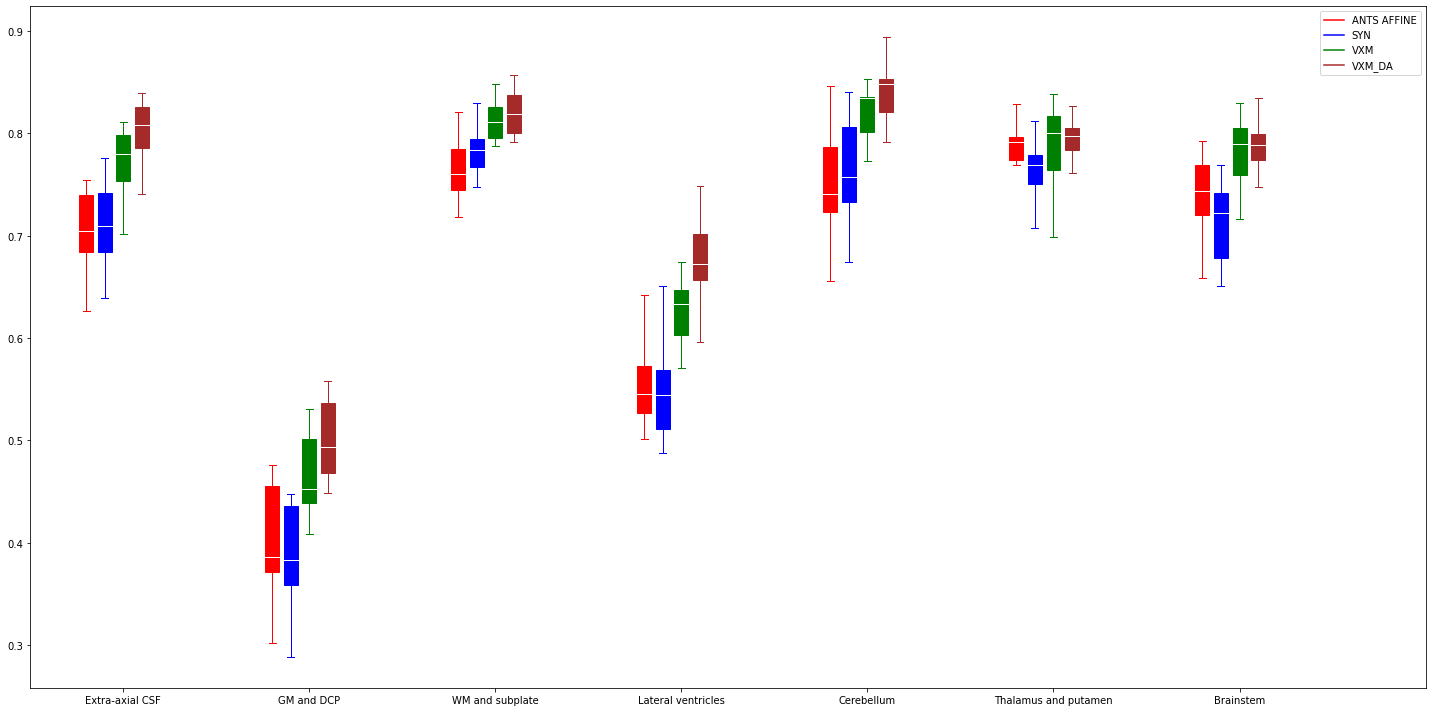

In [348]:
BoxPlotGroup(ANTS=DS_Inst1_ANTS_Normal,SYN=DS_Inst1_SYN_Normal,VXM=DS_Inst1_VXM_Normal,VXM_DA=DS_Inst1_VXM_DA_Normal,Title="Dice-Score",filename='Box_Plots/Norm_Ins1_DS.eps')

##### Jaccard-Score

In [349]:
JS_Inst1_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_1,'jc'))
JS_Inst1_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_1,'jc'))
JS_Inst1_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_1,'jc'))
JS_Inst1_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_1,'jc'))

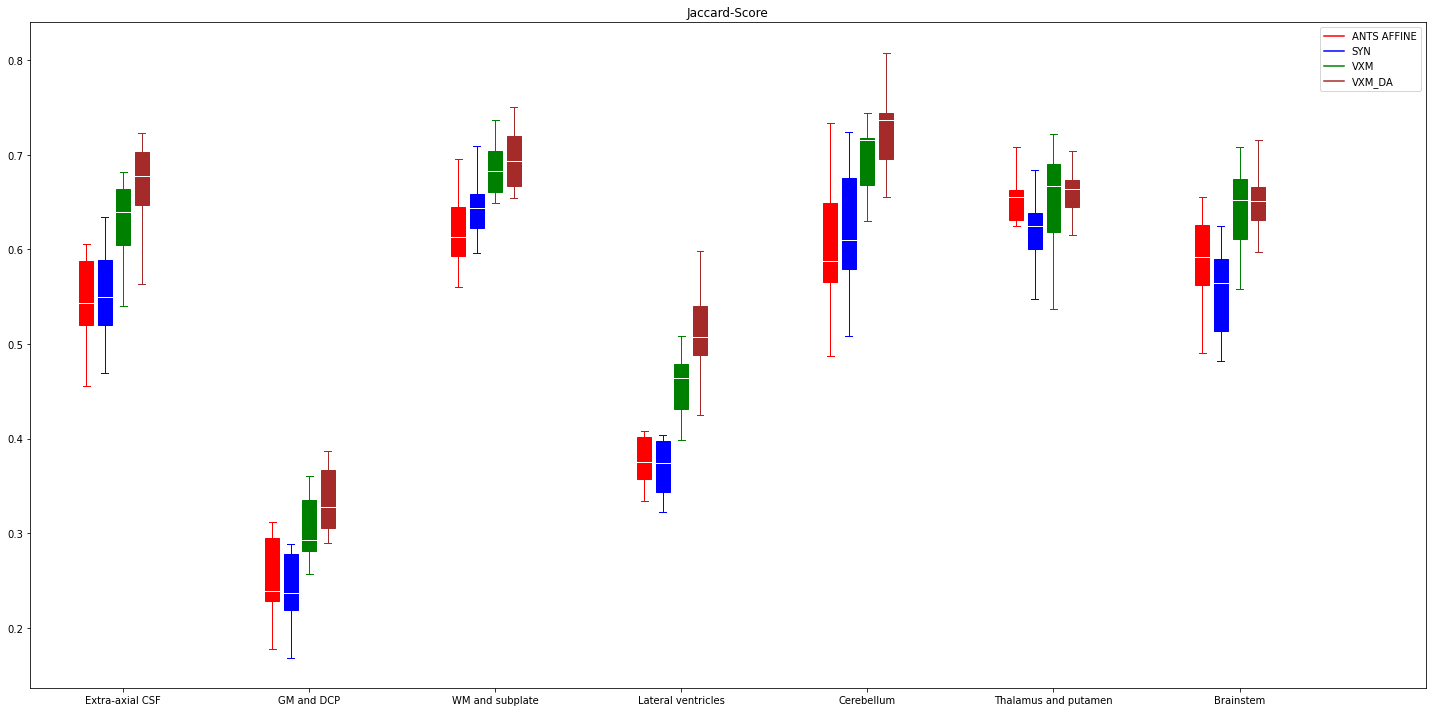

In [224]:
BoxPlotGroup(ANTS=JS_Inst1_ANTS_Normal,SYN=JS_Inst1_SYN_Normal,VXM=JS_Inst1_VXM_Normal,VXM_DA=JS_Inst1_VXM_DA_Normal,Title="Jaccard-Score",filename='Box_Plots/Norm_Ins1_JS.png')

##### HAUSDORFF DISTANCE

In [350]:
HD_Inst1_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_1,'HD'))
HD_Inst1_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_1,'HD'))
HD_Inst1_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_1,'HD'))
HD_Inst1_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_1,'HD'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


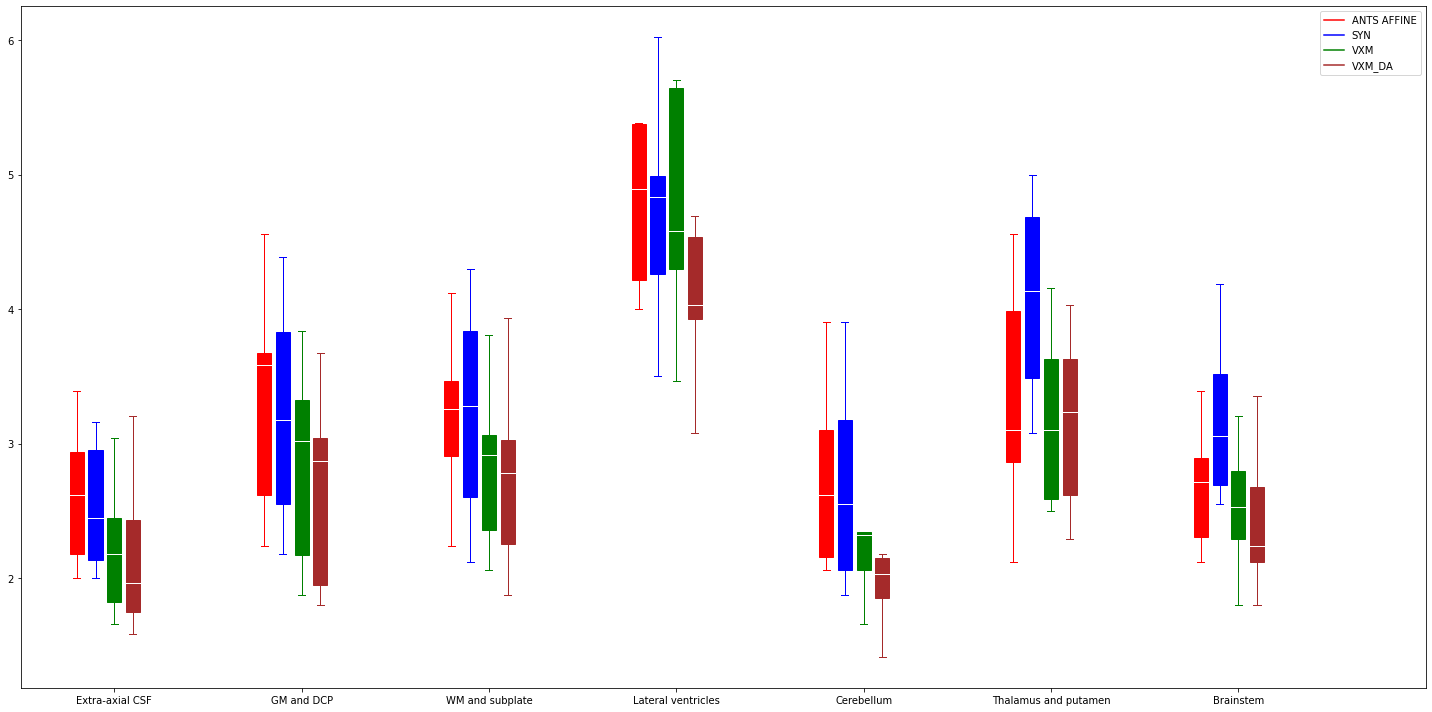

In [351]:
BoxPlotGroup(ANTS=HD_Inst1_ANTS_Normal,SYN=HD_Inst1_SYN_Normal,VXM=HD_Inst1_VXM_Normal,VXM_DA=HD_Inst1_VXM_DA_Normal,Title="HAUSDORFF DISTANCE",filename='Box_Plots/Norm_Ins1_HD.eps')

# 

# 

## Insti-2

In [229]:
df_ants_Nrml_2 = pd.read_csv('volume_metrics/ants_affine_normal_2.csv')
df_Syn_Nrml_2 = pd.read_csv('volume_metrics/ants_syn_normal_2.csv')
df_vxm_Nrml_2 = pd.read_csv('volume_metrics/VXM_nrml_Nrml_Int_1_Test_Nrml_Vienna_ss.csv')
df_vxm_DA_Nrml_2 = pd.read_csv('volume_metrics/VXM_NrmlErase_Int_1_Test_Nrml_Vienna_ss.csv')


##### Dice-Score

In [230]:
DS_Inst2_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_2))
DS_Inst2_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_2))
DS_Inst2_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_2))
DS_Inst2_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_2))

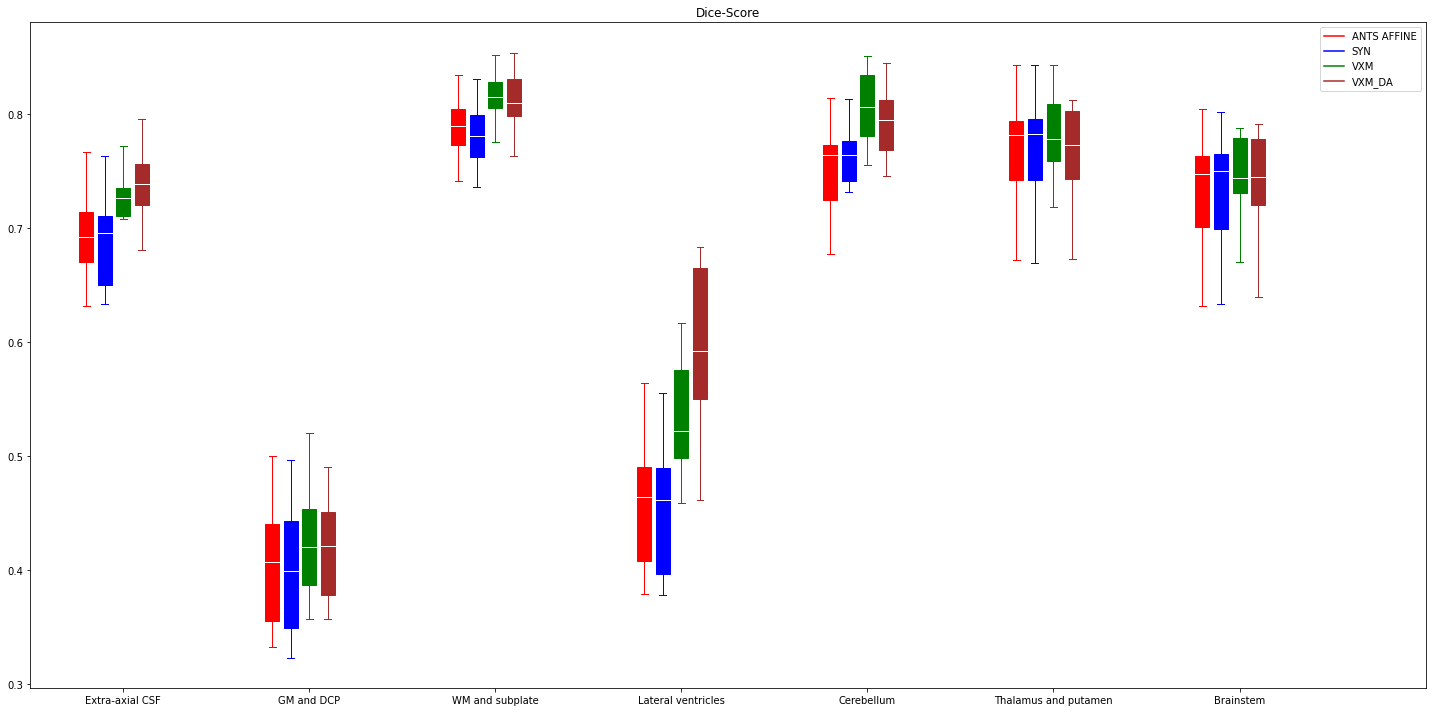

In [231]:
BoxPlotGroup(ANTS=DS_Inst2_ANTS_Normal,SYN=DS_Inst2_SYN_Normal,VXM=DS_Inst2_VXM_Normal,VXM_DA=DS_Inst2_VXM_DA_Normal,Title="Dice-Score",filename='Box_Plots/Norm_Ins2_DS.png')

##### Jaccard-Score

In [233]:
JS_Inst2_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_2,'jc'))
JS_Inst2_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_2,'jc'))
JS_Inst2_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_2,'jc'))
JS_Inst2_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_2,'jc'))

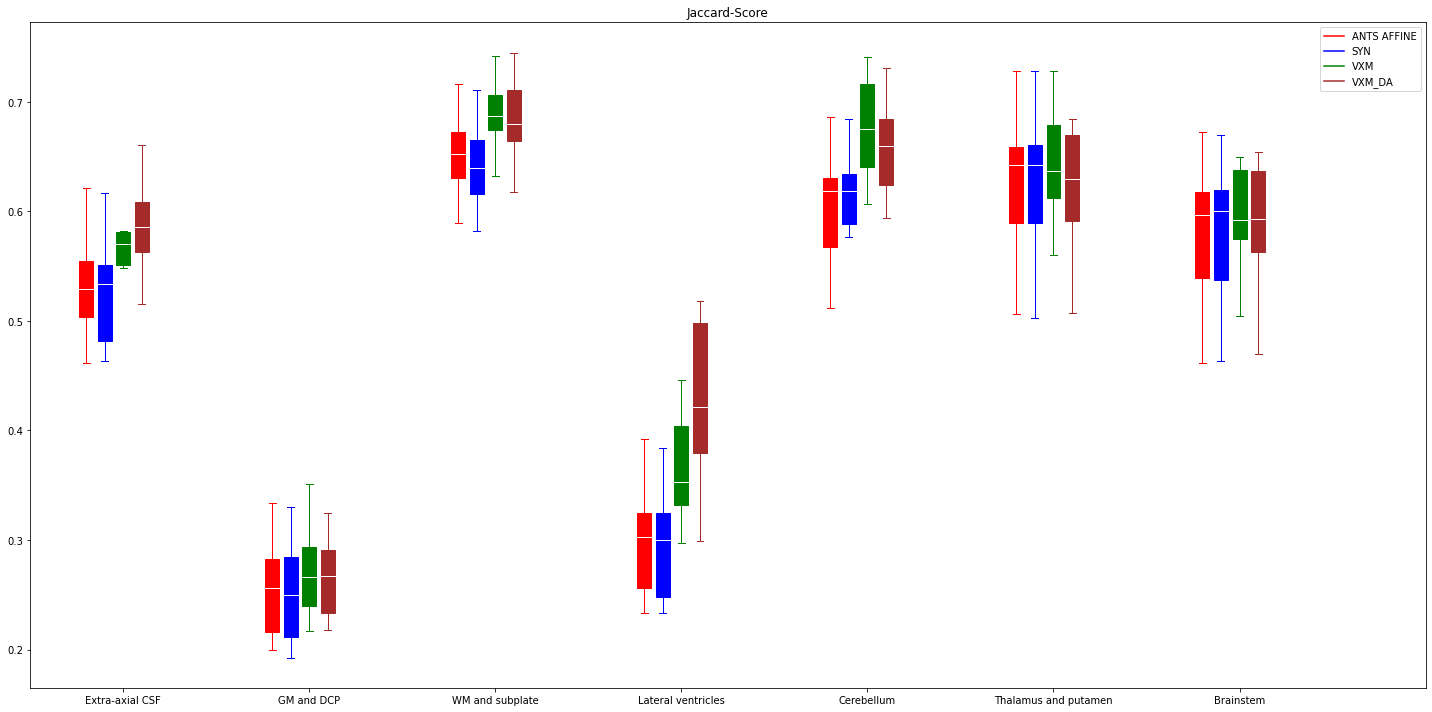

In [234]:
BoxPlotGroup(ANTS=JS_Inst2_ANTS_Normal,SYN=JS_Inst2_SYN_Normal,VXM=JS_Inst2_VXM_Normal,VXM_DA=JS_Inst2_VXM_DA_Normal,Title="Jaccard-Score",filename='Box_Plots/Norm_Ins2_JS.png')

##### HAUSDORFF DISTANCE

In [235]:
HD_Inst2_ANTS_Normal=pd.DataFrame(get_avg_metric(df_ants_Nrml_2,'HD'))
HD_Inst2_SYN_Normal=pd.DataFrame(get_avg_metric(df_Syn_Nrml_2,'HD'))
HD_Inst2_VXM_Normal=pd.DataFrame(get_avg_metric(df_vxm_Nrml_2,'HD'))
HD_Inst2_VXM_DA_Normal=pd.DataFrame(get_avg_metric(df_vxm_DA_Nrml_2,'HD'))

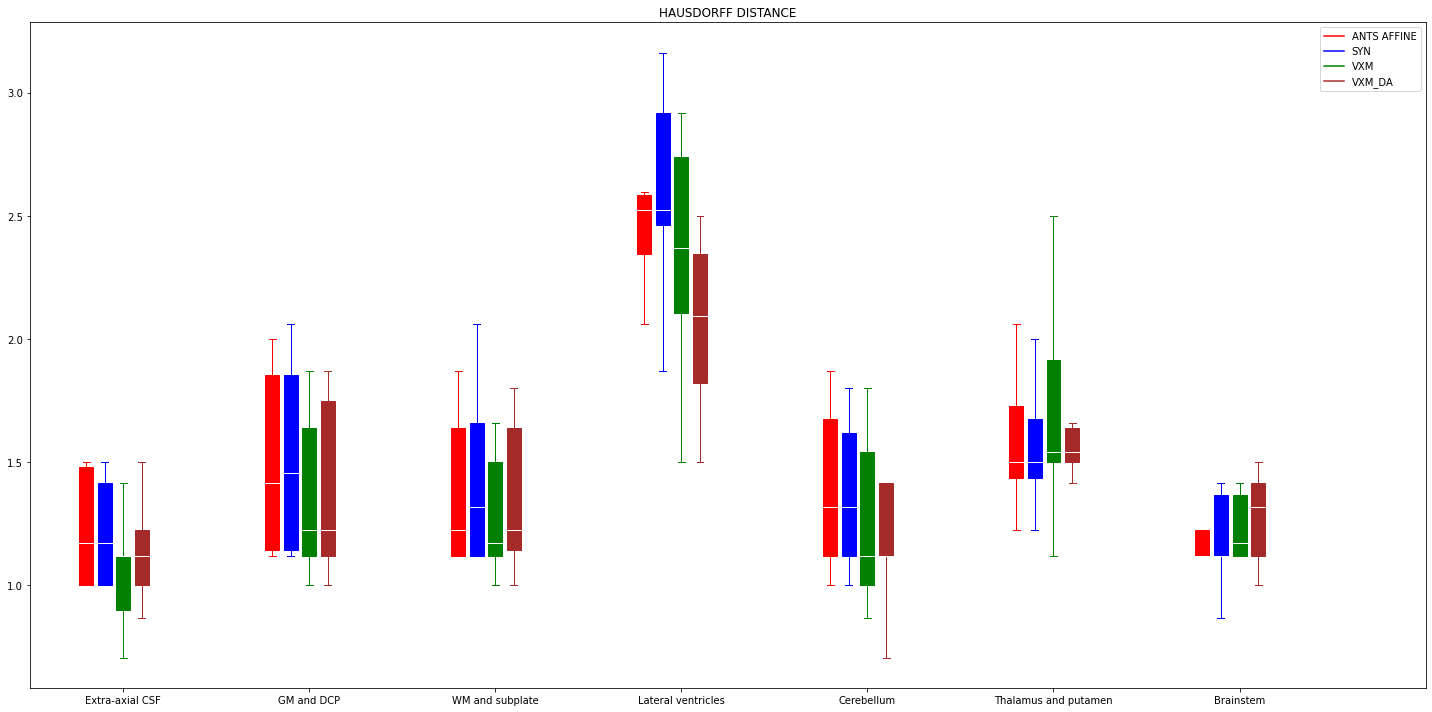

In [236]:
BoxPlotGroup(ANTS=HD_Inst2_ANTS_Normal,SYN=HD_Inst2_SYN_Normal,VXM=HD_Inst2_VXM_Normal,VXM_DA=HD_Inst2_VXM_DA_Normal,Title="HAUSDORFF DISTANCE",filename='Box_Plots/Norm_Ins2_HD.png')

# 

# 

## Pathology

## Insti-1

In [352]:
df_ants_patho_1 = pd.read_csv('volume_metrics/ants_affine_patho_1.csv')
df_Syn_patho_1 = pd.read_csv('volume_metrics/ants_syn_patho_1.csv')
df_vxm_patho_1 = pd.read_csv('volume_metrics/VXM_nrml_Nrml_Int_1_Test_Path_Insti_1_ss.csv')
df_vxm_DA_patho_1 = pd.read_csv('volume_metrics/VXM_NrmlErase_Int_1_Test_Path_Insti_1_ss.csv')


##### Dice-Score

In [353]:
DS_Inst1_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_1))
DS_Inst1_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_1))
DS_Inst1_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_1))
DS_Inst1_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_1))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


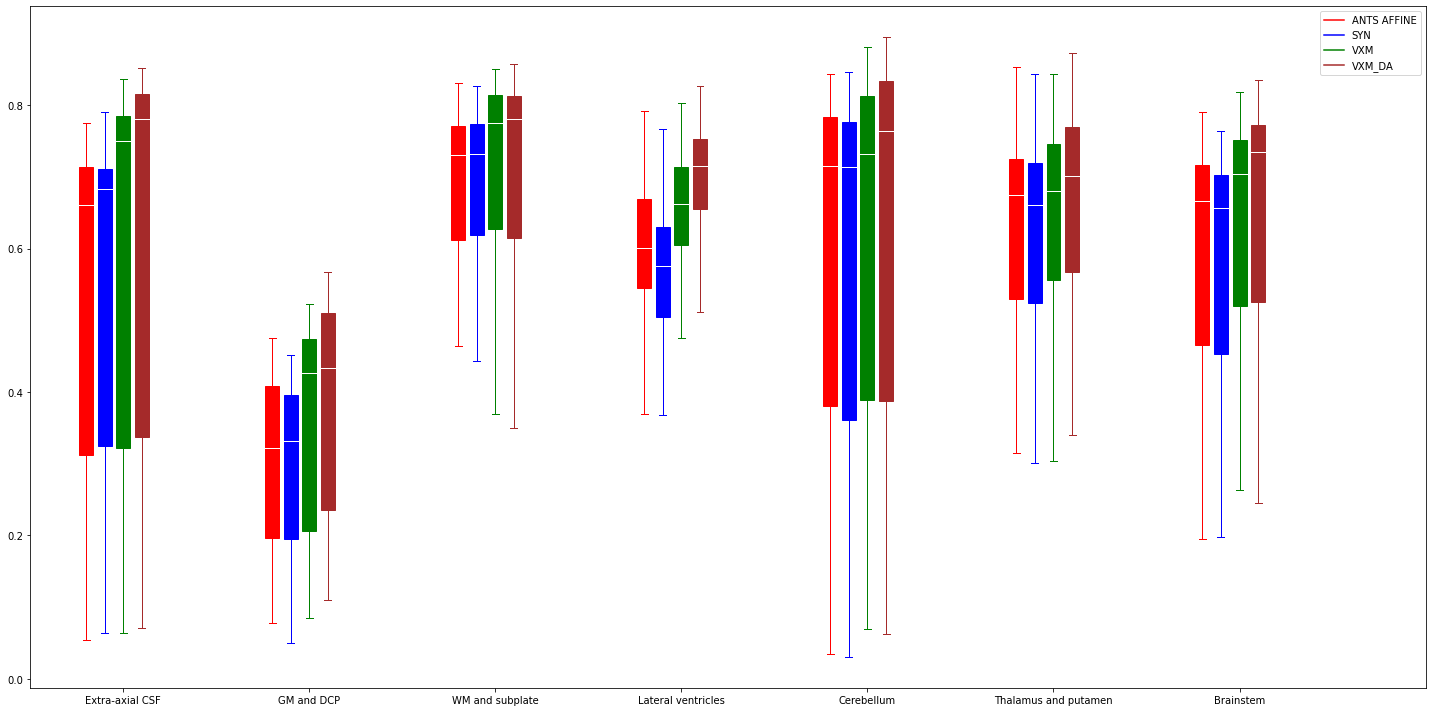

In [354]:
BoxPlotGroup(ANTS=DS_Inst1_ANTS_patho,SYN=DS_Inst1_SYN_patho,VXM=DS_Inst1_VXM_patho,VXM_DA=DS_Inst1_VXM_DA_patho,Title="Dice-Score",filename='Box_Plots/patho_Ins1_DS.eps')

##### Jaccard-Score

In [240]:
JS_Inst1_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_1,'jc'))
JS_Inst1_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_1,'jc'))
JS_Inst1_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_1,'jc'))
JS_Inst1_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_1,'jc'))

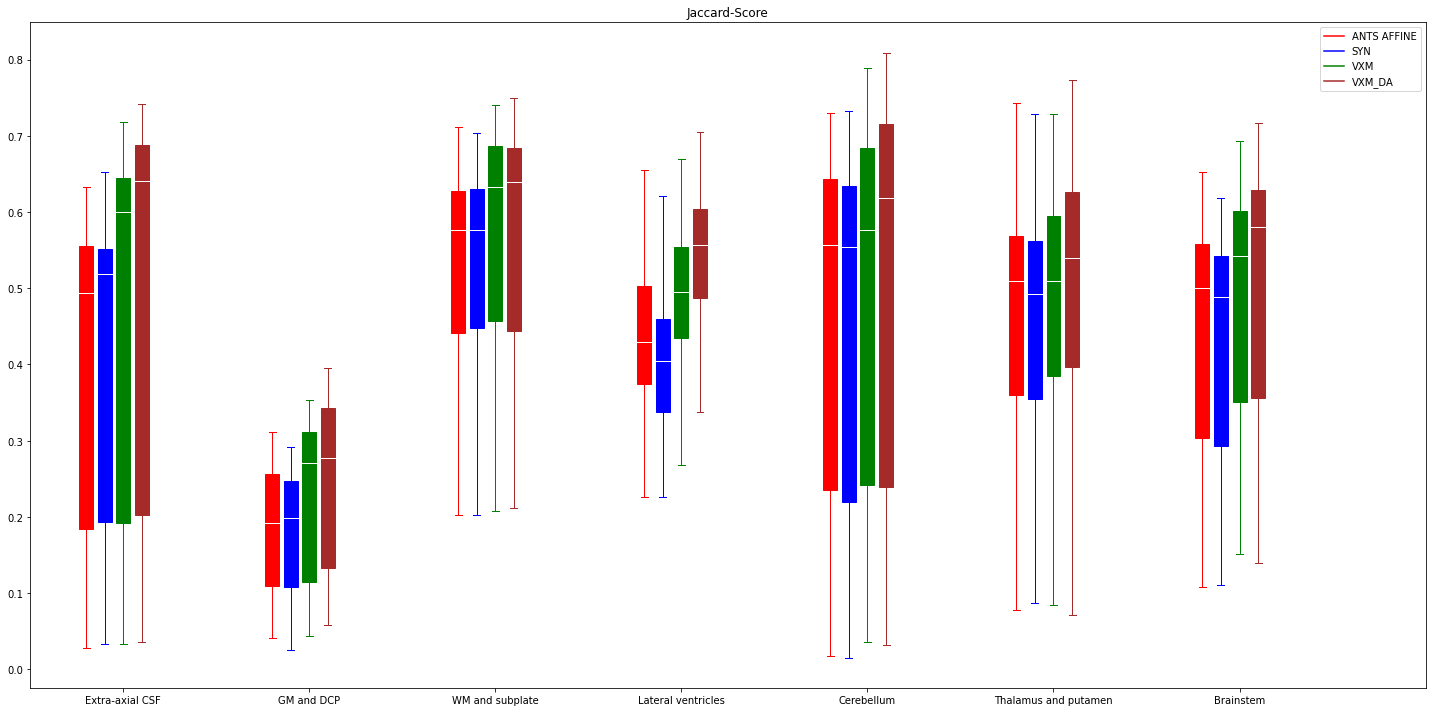

In [241]:
BoxPlotGroup(ANTS=JS_Inst1_ANTS_patho,SYN=JS_Inst1_SYN_patho,VXM=JS_Inst1_VXM_patho,VXM_DA=JS_Inst1_VXM_DA_patho,Title="Jaccard-Score",filename='Box_Plots/patho_Ins1_JS.png')

##### HAUSDORFF DISTANCE

In [355]:
HD_Inst1_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_1,'HD'))
HD_Inst1_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_1,'HD'))
HD_Inst1_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_1,'HD'))
HD_Inst1_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_1,'HD'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


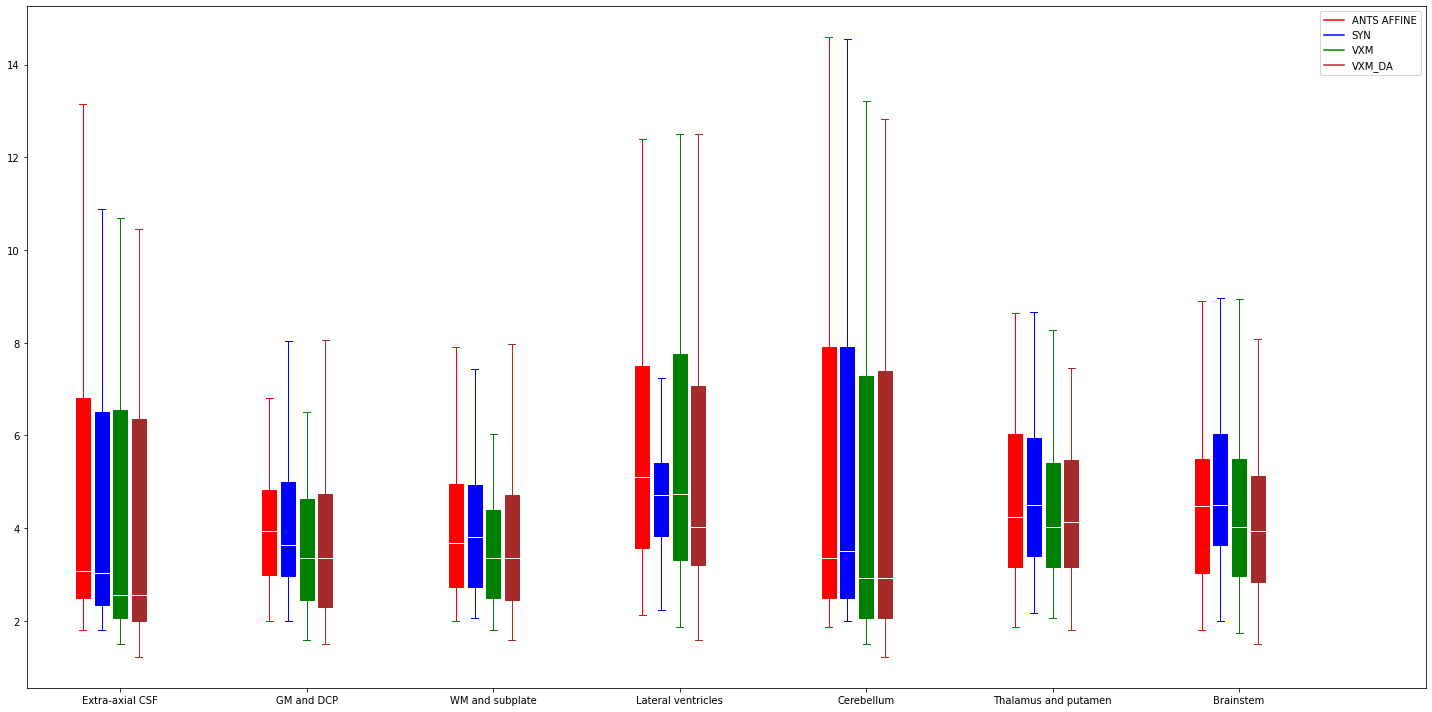

In [356]:
BoxPlotGroup(ANTS=HD_Inst1_ANTS_patho,SYN=HD_Inst1_SYN_patho,VXM=HD_Inst1_VXM_patho,VXM_DA=HD_Inst1_VXM_DA_patho,Title="HAUSDORFF DISTANCE",filename='Box_Plots/patho_Ins1_HD.eps')

# 

# 

## Insti-2

In [244]:
df_ants_patho_2 = pd.read_csv('volume_metrics/ants_affine_patho_2.csv')
df_Syn_patho_2 = pd.read_csv('volume_metrics/ants_syn_patho_2.csv')
df_vxm_patho_2 = pd.read_csv('volume_metrics/VXM_nrml_Nrml_Int_1_Test_Path_Vienna_ss.csv')
df_vxm_DA_patho_2 = pd.read_csv('volume_metrics/VXM_NrmlErase_Int_1_Test_Path_Vienna_ss.csv')


##### Dice-Score

In [245]:
DS_Inst2_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_2))
DS_Inst2_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_2))
DS_Inst2_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_2))
DS_Inst2_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_2))

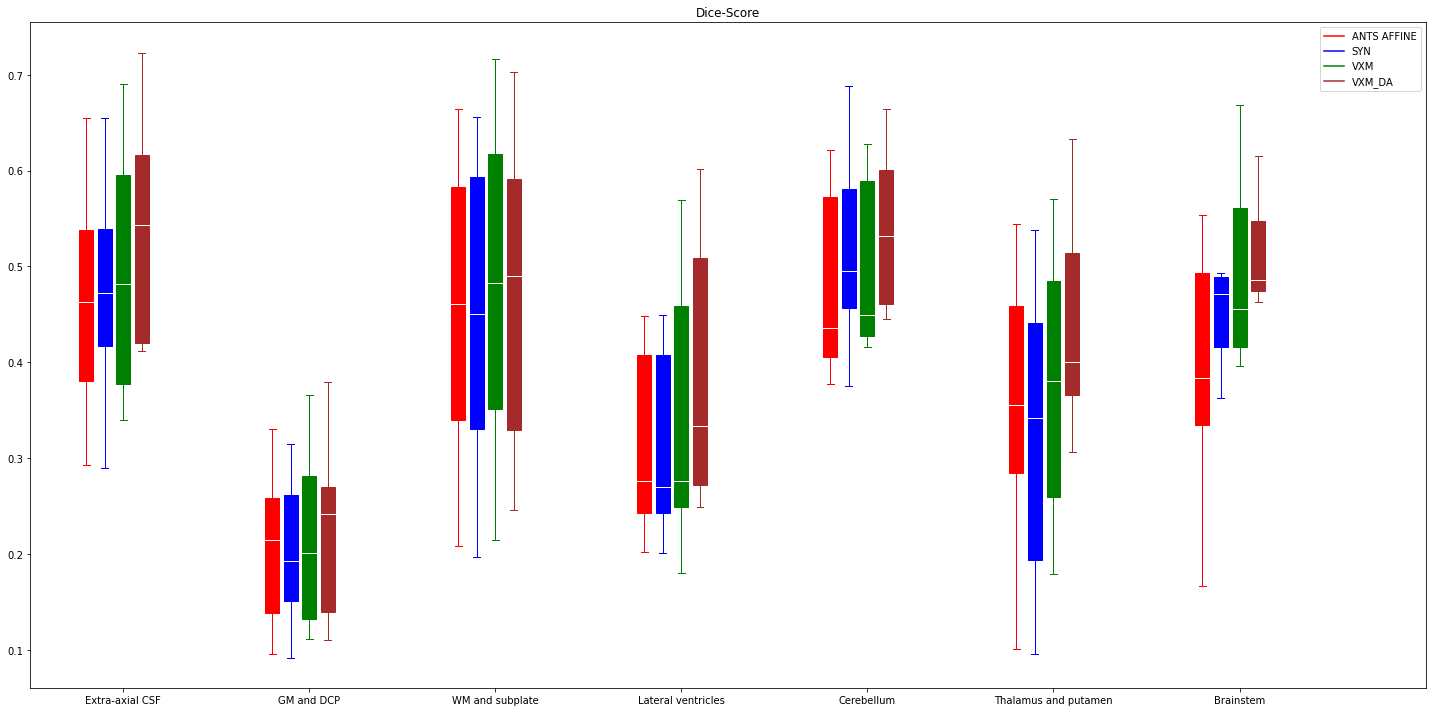

In [246]:
BoxPlotGroup(ANTS=DS_Inst2_ANTS_patho,SYN=DS_Inst2_SYN_patho,VXM=DS_Inst2_VXM_patho,VXM_DA=DS_Inst2_VXM_DA_patho,Title="Dice-Score",filename='Box_Plots/patho_Ins2_DS.png')

##### Jaccard-Score

In [247]:
JS_Inst2_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_2,'jc'))
JS_Inst2_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_2,'jc'))
JS_Inst2_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_2,'jc'))
JS_Inst2_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_2,'jc'))

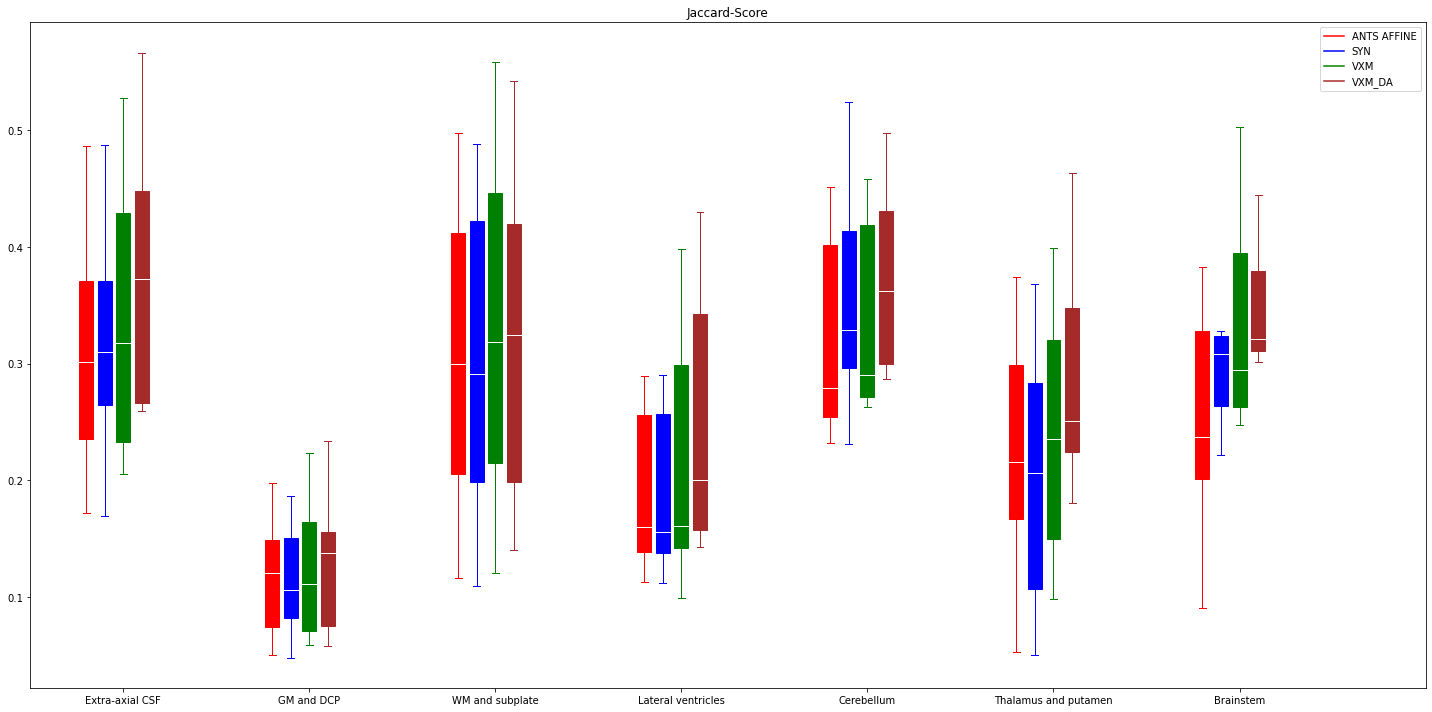

In [248]:
BoxPlotGroup(ANTS=JS_Inst2_ANTS_patho,SYN=JS_Inst2_SYN_patho,VXM=JS_Inst2_VXM_patho,VXM_DA=JS_Inst2_VXM_DA_patho,Title="Jaccard-Score",filename='Box_Plots/patho_Ins2_JS.png')

##### HAUSDORFF DISTANCE

In [249]:
HD_Inst2_ANTS_patho=pd.DataFrame(get_avg_metric(df_ants_patho_2,'HD'))
HD_Inst2_SYN_patho=pd.DataFrame(get_avg_metric(df_Syn_patho_2,'HD'))
HD_Inst2_VXM_patho=pd.DataFrame(get_avg_metric(df_vxm_patho_2,'HD'))
HD_Inst2_VXM_DA_patho=pd.DataFrame(get_avg_metric(df_vxm_DA_patho_2,'HD'))

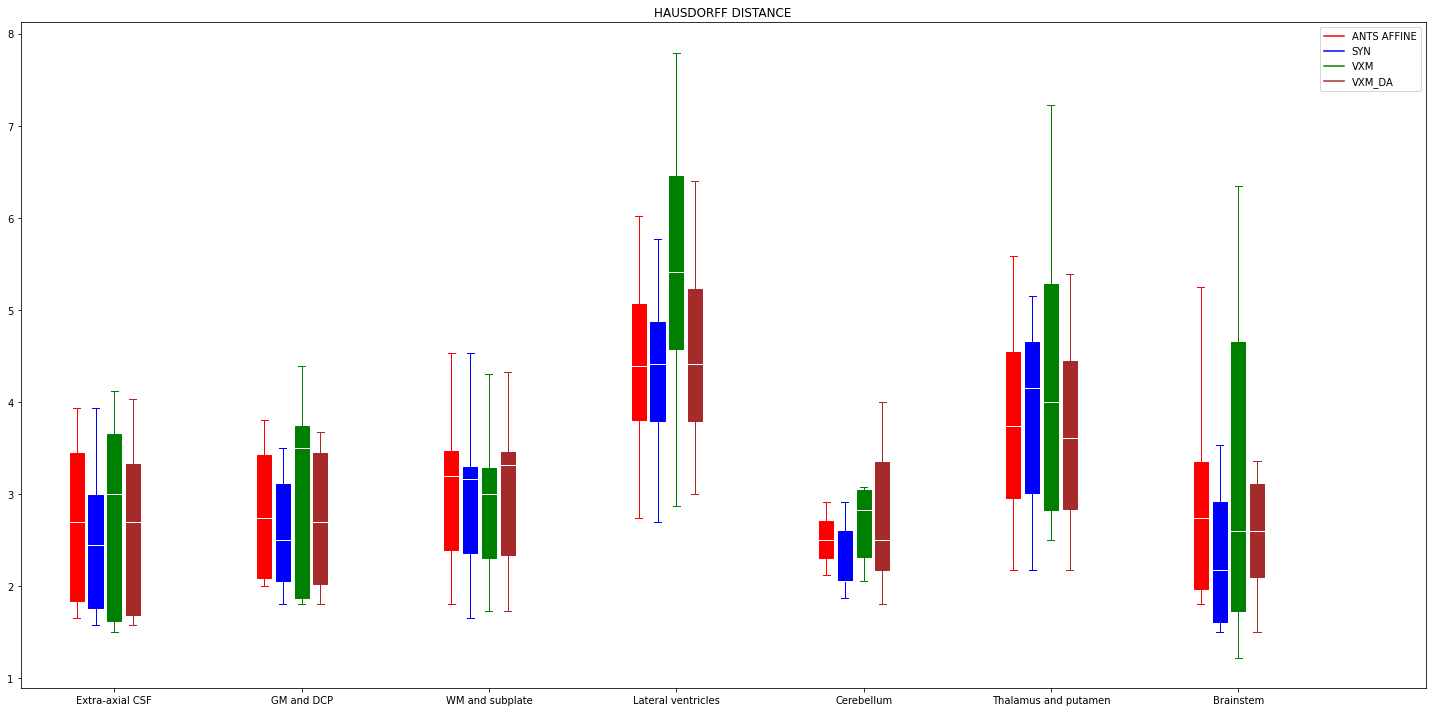

In [250]:
BoxPlotGroup(ANTS=HD_Inst2_ANTS_patho,SYN=HD_Inst2_SYN_patho,VXM=HD_Inst2_VXM_patho,VXM_DA=HD_Inst2_VXM_DA_patho,Title="HAUSDORFF DISTANCE",filename='Box_Plots/patho_Ins2_HD.png')

# 

# 

# Miscel

In [ ]:
def plot_metrics(struct_A,struct_V,struct_VDA,struct_VDA50,struct_VDA23,title):
    plt.rcParams["figure.figsize"] = [10,5]
    plt.rcParams["figure.autolayout"] = True

    # Pandas dataframe
    data = pd.DataFrame({"ANTS": struct_A, "VXM": struct_V, "VXM-DA":struct_VDA,"VXM-DABlr":struct_VDA50,"VXM-DA23":struct_VDA23})

    # Plot the dataframe
    ax = data[['ANTS', 'VXM','VXM-DA','VXM-DABlr','VXM-DA23']].plot(kind='box', title=title)

    # Display the plot
    plt.show()

## Tables

In [327]:
def get_mean(df,idx,isstd = True):
    if isstd:
        df = pd.DataFrame(df.std()).T
        df = df.round(2)
    else:
        df = pd.DataFrame(df.mean()).T
        df = df.round(3)
    df.index = [idx]
    return df

### Normal

## Insti 1

In [338]:
STD_Inst1_ANTS_normal = get_mean(DS_Inst1_ANTS_Normal,'DS_Inst1_ANTS_Normal')
STD_Inst1_SYN_normal = get_mean(DS_Inst1_SYN_Normal,'DS_Inst1_SYN_Normal')
STD_Inst1_VXM_normal = get_mean(DS_Inst1_VXM_Normal,'DS_Inst1_VXM_Normal')
STD_Inst1_VXM_DA_normal = get_mean(DS_Inst1_VXM_DA_Normal,'DS_Inst1_VXM_DA_Normal')

pd.concat([STD_Inst1_ANTS_normal,STD_Inst1_SYN_normal,STD_Inst1_VXM_normal,STD_Inst1_VXM_DA_normal])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst1_ANTS_Normal,0.04,0.06,0.03,0.06,0.06,0.05,0.04
DS_Inst1_SYN_Normal,0.04,0.05,0.03,0.06,0.05,0.05,0.04
DS_Inst1_VXM_Normal,0.04,0.04,0.02,0.03,0.04,0.05,0.03
DS_Inst1_VXM_DA_Normal,0.04,0.04,0.02,0.04,0.03,0.04,0.03


In [329]:
MEAN_Inst1_ANTS_normal = get_mean(DS_Inst1_ANTS_Normal,'DS_Inst1_ANTS_Normal',False)
MEAN_Inst1_SYN_normal = get_mean(DS_Inst1_SYN_Normal,'DS_Inst1_SYN_Normal',False)
MEAN_Inst1_VXM_normal = get_mean(DS_Inst1_VXM_Normal,'DS_Inst1_VXM_Normal',False)
MEAN_Inst1_VXM_DA_normal = get_mean(DS_Inst1_VXM_DA_Normal,'DS_Inst1_VXM_DA_Normal',False)

pd.concat([MEAN_Inst1_ANTS_normal,MEAN_Inst1_SYN_normal,MEAN_Inst1_VXM_normal,MEAN_Inst1_VXM_DA_normal])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst1_ANTS_Normal,0.701,0.401,0.765,0.565,0.752,0.771,0.737
DS_Inst1_SYN_Normal,0.708,0.388,0.781,0.553,0.764,0.756,0.713
DS_Inst1_VXM_Normal,0.769,0.467,0.813,0.628,0.818,0.785,0.783
DS_Inst1_VXM_DA_Normal,0.797,0.501,0.821,0.677,0.841,0.789,0.786


In [340]:
MEAN_Inst1_ANTS_normal = get_mean(HD_Inst1_ANTS_Normal,'HD_Inst1_ANTS_Patho',False)
MEAN_Inst1_SYN_normal = get_mean(HD_Inst1_SYN_Normal,'HD_Inst1_SYN_Patho',False)
MEAN_Inst1_VXM_normal = get_mean(HD_Inst1_VXM_DA_Normal,'HD_Inst1_VXM_Patho',False)
MEAN_Inst1_VXM_DA_normal = get_mean(HD_Inst1_VXM_DA_Normal,'HD_Inst1_VXM_DA_Patho',False)

pd.concat([MEAN_Inst1_ANTS_normal,MEAN_Inst1_SYN_normal,MEAN_Inst1_VXM_normal,MEAN_Inst1_VXM_DA_normal])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
HD_Inst1_ANTS_Patho,2.587,3.331,3.187,5.481,2.895,3.340,2.675
HD_Inst1_SYN_Patho,2.524,3.184,3.222,4.653,2.820,4.073,3.202
HD_Inst1_VXM_Patho,2.112,2.668,2.753,4.935,2.157,3.177,2.413
HD_Inst1_VXM_DA_Patho,2.112,2.668,2.753,4.935,2.157,3.177,2.413


## Insti 2

In [330]:
STD_Inst2_ANTS_normal = get_mean(DS_Inst2_ANTS_Normal,'DS_Inst2_ANTS_Normal')
STD_Inst2_SYN_normal = get_mean(DS_Inst2_SYN_Normal,'DS_Inst2_SYN_Normal')
STD_Inst2_VXM_normal = get_mean(DS_Inst2_VXM_Normal,'DS_Inst2_VXM_Normal')
STD_Inst2_VXM_DA_normal = get_mean(DS_Inst2_VXM_DA_Normal,'DS_Inst2_VXM_DA_Normal')

pd.concat([STD_Inst2_ANTS_normal,STD_Inst2_SYN_normal,STD_Inst2_VXM_normal,STD_Inst2_VXM_DA_normal])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst2_ANTS_Normal,0.04,0.06,0.03,0.06,0.04,0.05,0.05
DS_Inst2_SYN_Normal,0.04,0.06,0.03,0.06,0.04,0.06,0.05
DS_Inst2_VXM_Normal,0.04,0.06,0.03,0.05,0.04,0.07,0.04
DS_Inst2_VXM_DA_Normal,0.03,0.05,0.03,0.07,0.03,0.04,0.05


In [331]:
MEAN_Inst2_ANTS_normal = get_mean(DS_Inst2_ANTS_Normal,'DS_Inst2_ANTS_Normal',False)
MEAN_Inst2_SYN_normal = get_mean(DS_Inst2_SYN_Normal,'DS_Inst2_SYN_Normal',False)
MEAN_Inst2_VXM_normal = get_mean(DS_Inst2_VXM_Normal,'DS_Inst2_VXM_Normal',False)
MEAN_Inst2_VXM_DA_normal = get_mean(DS_Inst2_VXM_DA_Normal,'DS_Inst2_VXM_DA_Normal',False)

pd.concat([MEAN_Inst2_ANTS_normal,MEAN_Inst2_SYN_normal,MEAN_Inst2_VXM_normal,MEAN_Inst2_VXM_DA_normal])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst2_ANTS_Normal,0.693,0.406,0.789,0.462,0.755,0.771,0.735
DS_Inst2_SYN_Normal,0.688,0.398,0.783,0.457,0.760,0.768,0.735
DS_Inst2_VXM_Normal,0.728,0.429,0.818,0.533,0.806,0.767,0.745
DS_Inst2_VXM_DA_Normal,0.739,0.419,0.813,0.598,0.794,0.767,0.741


## Pathology

## Insti 1

In [332]:
STD_Inst1_ANTS_Patho = get_mean(DS_Inst1_ANTS_patho,'DS_Inst1_ANTS_Patho')
STD_Inst1_SYN_Patho = get_mean(DS_Inst1_SYN_patho,'DS_Inst1_SYN_Patho')
STD_Inst1_VXM_Patho = get_mean(DS_Inst1_VXM_patho,'DS_Inst1_VXM_Patho')
STD_Inst1_VXM_DA_Patho = get_mean(DS_Inst1_VXM_DA_patho,'DS_Inst1_VXM_DA_Patho')

pd.concat([STD_Inst1_ANTS_Patho,STD_Inst1_SYN_Patho,STD_Inst1_VXM_Patho,STD_Inst1_VXM_DA_Patho])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst1_ANTS_Patho,0.24,0.13,0.12,0.13,0.27,0.17,0.16
DS_Inst1_SYN_Patho,0.25,0.13,0.12,0.10,0.27,0.17,0.15
DS_Inst1_VXM_Patho,0.26,0.15,0.13,0.13,0.27,0.16,0.15
DS_Inst1_VXM_DA_Patho,0.28,0.15,0.13,0.13,0.28,0.17,0.16


In [333]:
MEAN_Inst1_ANTS_Patho = get_mean(DS_Inst1_ANTS_patho,'DS_Inst1_ANTS_Patho',False)
MEAN_Inst1_SYN_Patho = get_mean(DS_Inst1_SYN_patho,'DS_Inst1_SYN_Patho',False)
MEAN_Inst1_VXM_Patho = get_mean(DS_Inst1_VXM_patho,'DS_Inst1_VXM_Patho',False)
MEAN_Inst1_VXM_DA_Patho = get_mean(DS_Inst1_VXM_DA_patho,'DS_Inst1_VXM_DA_Patho',False)

pd.concat([MEAN_Inst1_ANTS_Patho,MEAN_Inst1_SYN_Patho,MEAN_Inst1_VXM_Patho,MEAN_Inst1_VXM_DA_Patho])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst1_ANTS_Patho,0.540,0.296,0.688,0.590,0.564,0.614,0.594
DS_Inst1_SYN_Patho,0.542,0.290,0.684,0.562,0.566,0.600,0.583
DS_Inst1_VXM_Patho,0.599,0.357,0.719,0.637,0.599,0.629,0.636
DS_Inst1_VXM_DA_Patho,0.623,0.384,0.719,0.682,0.605,0.647,0.648


In [339]:
MEAN_Inst1_ANTS_Patho = get_mean(HD_Inst1_ANTS_patho,'HD_Inst1_ANTS_Patho',False)
MEAN_Inst1_SYN_Patho = get_mean(HD_Inst1_SYN_patho,'HD_Inst1_SYN_Patho',False)
MEAN_Inst1_VXM_Patho = get_mean(HD_Inst1_VXM_patho,'HD_Inst1_VXM_Patho',False)
MEAN_Inst1_VXM_DA_Patho = get_mean(HD_Inst1_VXM_DA_patho,'HD_Inst1_VXM_DA_Patho',False)

pd.concat([MEAN_Inst1_ANTS_Patho,MEAN_Inst1_SYN_Patho,MEAN_Inst1_VXM_Patho,MEAN_Inst1_VXM_DA_Patho])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
HD_Inst1_ANTS_Patho,5.468,4.173,4.047,5.788,5.084,4.906,4.786
HD_Inst1_SYN_Patho,5.069,4.047,4.097,5.008,5.094,5.087,5.094
HD_Inst1_VXM_Patho,5.141,3.707,3.694,5.686,4.805,4.752,4.585
HD_Inst1_VXM_DA_Patho,5.025,3.694,3.765,5.373,4.734,4.665,4.430


## Insti 2

In [335]:
STD_Inst2_ANTS_Patho = get_mean(DS_Inst2_ANTS_patho,'DS_Inst2_ANTS_Patho')
STD_Inst2_SYN_Patho = get_mean(DS_Inst2_SYN_patho,'DS_Inst2_SYN_Patho')
STD_Inst2_VXM_Patho = get_mean(DS_Inst2_VXM_patho,'DS_Inst2_VXM_Patho')
STD_Inst2_VXM_DA_Patho = get_mean(DS_Inst2_VXM_DA_patho,'DS_Inst2_VXM_DA_Patho')

pd.concat([STD_Inst2_ANTS_Patho,STD_Inst2_SYN_Patho,STD_Inst2_VXM_Patho,STD_Inst2_VXM_DA_Patho])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst2_ANTS_Patho,0.13,0.09,0.17,0.10,0.20,0.15,0.13
DS_Inst2_SYN_Patho,0.12,0.08,0.17,0.10,0.11,0.16,0.10
DS_Inst2_VXM_Patho,0.14,0.10,0.18,0.15,0.19,0.15,0.19
DS_Inst2_VXM_DA_Patho,0.13,0.10,0.17,0.15,0.21,0.12,0.14


In [336]:
MEAN_Inst2_ANTS_Patho = get_mean(DS_Inst2_ANTS_patho,'DS_Inst2_ANTS_Patho',False)
MEAN_Inst2_SYN_Patho = get_mean(DS_Inst2_SYN_patho,'DS_Inst2_SYN_Patho',False)
MEAN_Inst2_VXM_Patho = get_mean(DS_Inst2_VXM_patho,'DS_Inst2_VXM_Patho',False)
MEAN_Inst2_VXM_DA_Patho = get_mean(DS_Inst2_VXM_DA_patho,'DS_Inst2_VXM_DA_Patho',False)

pd.concat([MEAN_Inst2_ANTS_Patho,MEAN_Inst2_SYN_Patho,MEAN_Inst2_VXM_Patho,MEAN_Inst2_VXM_DA_Patho])

,Extra-axial CSF,Gray Matter and developing cortical plate,White matter and subplate,Lateral ventricles,Cerebellum,Thalamus and putamen,Brainstem
DS_Inst2_ANTS_Patho,0.464,0.205,0.454,0.318,0.435,0.355,0.394
DS_Inst2_SYN_Patho,0.476,0.203,0.450,0.317,0.519,0.321,0.455
DS_Inst2_VXM_Patho,0.494,0.215,0.479,0.349,0.453,0.374,0.453
DS_Inst2_VXM_DA_Patho,0.536,0.221,0.469,0.392,0.478,0.443,0.474


In [312]:
np.mean([0.623157,0.384246,0.719096,0.682092,0.605477,0.646965,0.647918])
np.mean([0.541708,0.289852,0.683967,0.562352,0.566147,0.600248,0.583311])

0.5467978571428572

In [323]:
!nvidia-smi

Sun Aug  7 19:24:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.43.04    Driver Version: 515.43.04    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:05:00.0 Off |                  N/A |
|  0%   36C    P8    23W / 350W |  15927MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------